# 0. Review 

## 0.A Scikit-Learn

Scikit-Learn is a machine learning python package. It allows users access machine learning algorithms via **object-oriented programming**.

## 0.B Data Set

I will be using a dataset of antibotic resistance in bacteria strains. 

- Each bacteria is labelled for their antibotic resistance to the antibotic, azithromycin.

- Additionally, each bacteria sample is labelled if its genome contains certain strands of DNA.

We would like to learn antibotic resistance from the bacterial genome.


## 0.C Data Processing

We did a bit of data preprocessing: 
-  encoded the resistance feature as 1 - "suspectible", 0 - "resistant."

- encoded all features of DNA strands as 1 - "if it's genome contains the strand of DNA", 0 - "if it's genome does not contain the strand of DNA"

## 0.D Trained Model: Gaussian Naive Bayes

We used a Gaussian Naive Bayes algorithm to learn classifier of antibotic resistance in a bacteria. I run the code to create the model again.

In [ ]:
import pandas as pd

#load training data
Y_training_set = pd.read_csv('datasets/Y_training_set')
training_set = pd.read_csv('datasets/training_set')

#import naive bayes

from sklearn.naive_bayes import GaussianNB

#instantiate a Naive Bayes classifier 
gNB = GaussianNB()

#learn classifier from data 
gNB.fit(training_set,Y_training_set.values.ravel())

## 0.D Model Evaluation: Guassian Naive Bayes

We then evaluated the Guassian Naive Bayes classifier on the testing data and found that the model has accuracy of $88\%$. 

**In this section, we will be exploring ways of improving model accuracy and comparing classifiers**

# 4. Model Improvement: Bernoulli Naive Bayes

In [86]:
from sklearn.naive_bayes import BernoulliNB

#instantiate a Naive Bayes classifier 
bNB = BernoulliNB()

bNB.fit(training_set,Y_training_set.values.ravel())

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

In [87]:
bNB.class_log_prior_

array([-0.60249281, -0.79284654])

In [111]:
bNB.classes_

array([0, 1])

In [88]:
bNB.feature_log_prob_

array([[-5.02388052, -5.02388052, -5.02388052, ..., -4.33073334,
        -4.33073334, -4.33073334],
       [-3.44998755, -3.44998755, -3.44998755, ..., -4.83628191,
        -4.83628191, -4.83628191]])

In [89]:
bNB.feature_count_

array([[0., 0., 0., ..., 1., 1., 1.],
       [3., 3., 3., ..., 0., 0., 0.]])

In [90]:
bNB.score(test_set,Y_test_set)

0.9152542372881356

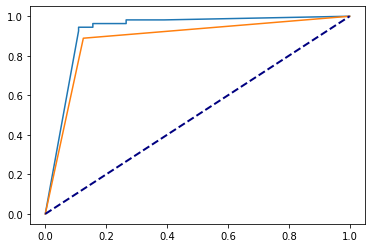

In [110]:
from sklearn.metrics import roc_curve
fpr_bNB, tpr_bNB, _ = roc_curve(Y_test_set, bNB.predict_proba(test_set)[:,1])
fpr_gNB, tpr_gNB, _ = roc_curve(Y_test_set, gNB.predict_proba(test_set)[:,1])

import matplotlib.pyplot as plt
plt.figure()
lw = 2
plt.plot(fpr_bNB, tpr_bNB)
plt.plot(fpr_gNB, tpr_gNB)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.show()

# Possible Improvements

- Allow for interactions: 

Logistic regression, linear discriminant analysis (LDA) and quadratic discriminant analysis (QDA). However, LDA and QDA assume that probability that a feature takes on a given value is Gaussian. Logistic regression does not make assumption of a probability distribution. However, you have to tell the logistic regression what interactions to consider. Doing logistic regression with all interactions terms and some penalty, like LASSO, might be suitable.

- Parametric methods might be unsuitable:

Tree based methods or KNN might be suitable for handling such a complex problem.